Epoch 1/50
83/83 [==============================] - 67s 69ms/step - loss: 2792.9490
Epoch 2/50
83/83 [==============================] - 5s 64ms/step - loss: 208.0650
Epoch 3/50
83/83 [==============================] - 5s 55ms/step - loss: 192.5687
Epoch 4/50
83/83 [==============================] - 5s 57ms/step - loss: 194.0312
Epoch 5/50
83/83 [==============================] - 4s 54ms/step - loss: 183.9062
Epoch 6/50
83/83 [==============================] - 5s 54ms/step - loss: 196.2263
Epoch 7/50
83/83 [==============================] - 5s 56ms/step - loss: 180.5606
Epoch 8/50
83/83 [==============================] - 5s 55ms/step - loss: 185.2791
Epoch 9/50
83/83 [==============================] - 4s 52ms/step - loss: 181.8617
Epoch 10/50
83/83 [==============================] - 5s 55ms/step - loss: 179.7922
Epoch 11/50
83/83 [==============================] - 5s 55ms/step - loss: 189.8661
Epoch 12/50
83/83 [==============================] - 4s 53ms/step - loss: 175.2821: 0s - loss


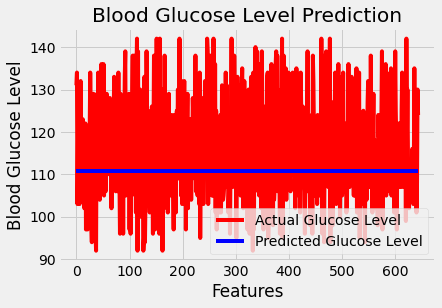

The root mean squared error is 13.424718971535826.


INFO:tensorflow:Assets written to: C:\Users\Vaishali\AppData\Local\Temp\tmp9slqfrzd\assets


INFO:tensorflow:Assets written to: C:\Users\Vaishali\AppData\Local\Temp\tmp9slqfrzd\assets


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import csv

dataset=pd.read_csv('Final_Data_Regression.csv')
x,y=train_test_split(dataset,test_size=0.1,random_state=4)
x.to_csv('training.csv')
y.to_csv('testing.csv')


def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual Glucose Level')
    plt.plot(predicted, color='blue',label='Predicted Glucose Level')
    plt.title('Blood Glucose Level Prediction')
    plt.xlabel('Features')
    plt.ylabel('Blood Glucose Level')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

dataset = pd.read_csv('training.csv')

dataset_test=pd.read_csv('testing.csv')



data=dataset.to_numpy()
X_train=data[:data.shape[0],:-1]
y_train=data[:data.shape[0],-1]

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

data2=dataset_test.to_numpy()
X_test=data2[:data2.shape[0],:-1]
y_test=data2[:data2.shape[0],-1]

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=70)

predicted_glucose_level = regressorGRU.predict(X_test)

plot_predictions(y_test,predicted_glucose_level)
return_rmse(y_test,predicted_glucose_level)

converter = tf.lite.TFLiteConverter.from_keras_model(regressorGRU)
tflite_model = converter.convert()

with open('GRURegression.tflite', 'wb') as f:
  f.write(tflite_model)

